In [306]:
print("hello")

import torch
x = torch.randn(2, 3,4)
print(x)
y= x.view(2, 4,3)
print(f"shape of y: {y.shape}")

hello
tensor([[[-0.0174, -1.0289,  0.4262, -1.3303],
         [-0.7120,  1.0064,  0.7244, -0.7196],
         [ 0.6406, -0.2342,  0.1886,  0.0197]],

        [[-0.2416, -1.8512,  0.2685, -0.3027],
         [ 0.4224, -0.8596,  0.2910,  0.6529],
         [ 2.0980, -0.9243, -0.4598,  1.1567]]])
shape of y: torch.Size([2, 4, 3])


In [307]:
from datasets import load_dataset

def get_data_set(config):
    """
    Load the dataset based on the configuration.
    
    Args:
        config: Configuration object containing dataset settings.
    
    Returns:
        Dataset object.
    """
    ds_raw = load_dataset('opus_books',f'{config["lang_src"]}.{config["lang_tgt"]}', split='train')
    ds = ds.shuffle(seed=config["seed"])

def main():
    get_data_set(config)

if __name__ == "__main__":
    main()

NameError: name 'config' is not defined

In [12]:
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import WordLevelTrainer

# Define the tokenizer
tokenizer = Tokenizer(WordLevel(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()

# Define special tokens and train the tokenizer
special_tokens = ["[UNK]", "[CLS]", "[SOS]", "[EOS]", "[PAD]", "[MASK]"]
trainer = WordLevelTrainer(special_tokens=special_tokens, min_frequency=1)

# Example sentences
sentences = [
    "I love programming.",
    "Transformers are powerful models.",
    "Tokenization is an important step."
]

# Train the tokenizer
tokenizer.train_from_iterator(sentences, trainer=trainer)

# Add special tokens during preprocessing
max_length = 8
for sentence in sentences:
    tokenized = tokenizer.encode(f"[SOS] {sentence} [EOS]")
    padded_tokens = tokenized.tokens + ["[PAD]"] * (max_length - len(tokenized.tokens))
    print(padded_tokens)

['[SOS]', 'I', 'love', 'programming', '.', '[EOS]', '[PAD]', '[PAD]']
['[SOS]', 'Transformers', 'are', 'powerful', 'models', '.', '[EOS]', '[PAD]']
['[SOS]', 'Tokenization', 'is', 'an', 'important', 'step', '.', '[EOS]']


In [14]:
class superobj:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f"superobj(name={self.name})"

class subobj(superobj):
    def __init__(self, name:str, value:int):
        super().__init__(name)
        self.value = value

    def __repr__(self):
        return f"subobj(name={self.name}, value={self.value})"

obj1 = subobj(42, "ravi")
print(obj1)

subobj(name=42, value=ravi)


In [26]:
import torch

def causal_mask(size):
    """
    Create a causal mask for the decoder input.
    
    Args:
        size: The size of the mask (sequence length).
        
    Returns:
        A causal mask tensor of shape (1, 1, size, size).
    """
    mask = torch.triu(torch.ones(size, size), diagonal=1).type(torch.int)
    return mask==0  

def apply_mask(x, mask):
    """
    Apply a mask to the input tensor.
    
    Args:
        x: Input tensor of shape (batch_size, seq_len, d_model).
        mask: Mask tensor of shape (1, 1, seq_len, seq_len).
        
    Returns:
        Masked tensor.
    """
    return x.masked_fill(mask == 0, float('-inf'))


x = torch.randn((4, 4))
mask = causal_mask(4)
y = apply_mask(x, mask)

print(f"x: {x}")
print(f"mask: {mask}")
print(f"y: {y}")


x: tensor([[ 2.3086,  0.6334, -2.4174, -0.5846],
        [ 1.6562,  0.6160,  0.2734, -1.8913],
        [-0.3941,  0.4608,  0.1235, -0.2375],
        [-2.0697,  0.3659,  0.0857, -2.3181]])
mask: tensor([[ True, False, False, False],
        [ True,  True, False, False],
        [ True,  True,  True, False],
        [ True,  True,  True,  True]])
y: tensor([[ 2.3086,    -inf,    -inf,    -inf],
        [ 1.6562,  0.6160,    -inf,    -inf],
        [-0.3941,  0.4608,  0.1235,    -inf],
        [-2.0697,  0.3659,  0.0857, -2.3181]])


In [ ]:
import torch.nn as nn

torch.manual_seed(42)  # Set random seed for reproducibility

x = torch.randn(100,5) # Create a random tensor of shape (10, 5)
#print(f"x: {x}")
#create a vector of type tensor with constant values
w_true = torch.tensor([1., 2, 3, 4, 5])  # Create a tensor with constant values``

y = x @ (w_true**2)  # Perform matrix multiplication
print(y.size())

# print the output of one of the x item
y_item = x[10]@ (w_true**2)
print(f"Output for x[10] {x[10]}: y: {y_item.item()}, weights: {w_true**2}")  # Print the output for one of the x items

class new_model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_1 = nn.Linear(input_dim, output_dim)
        self.activation = nn.ReLU()
       # self.linear_2 = nn.Linear(output_dim, output_dim)
        self.output = nn.Linear(output_dim, 1)

    def forward(self, x):
        return self.output(self.activation(self.linear_1(x)))
        #return self.output(self.activation(self.linear_2(self.activation(self.linear_1(x)))))
    
model = new_model(5, 100)  # Create an instance of the model
# Define a loss function and optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

#break the data set x into test and validation sets
x_train, x_val = torch.split(x, [80, 20])  # Split into training and validation sets
y_train = x_train @ (w_true**2)  # Generate target values for training set
y_val = x_val @ (w_true**2)  # Generate target values for validation set
# Convert to tensors
# x = torch.tensor(x_train, dtype=torch.float32)  
# y = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Unsqueeze to match output shape


# Training loop
for epoch in range(200):
    optimizer.zero_grad()
    y_pred = model(x)  # Forward pass
    loss = loss_fn(y_pred.squeeze(), y)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update model parameters
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")
        #print(f"Model parameters: {list(model.parameters())}")

#test some predictions using y_val
# x_test = torch.tensor(x_val, dtype=torch.float32)
# y_test = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)  # Unsqueeze to match output shape
y_pred_test = model(x_val)  # Forward pass on test set
print(f"Test predictions shape: {y_pred_test.shape}")
print(f"Test predictions: {y_pred_test.squeeze()}")
print(f"Test targets: {y_val.squeeze()}")
# caluclate the loss on the test set
test_loss = loss_fn(y_pred_test.squeeze(), y_val)
print(f"Test Loss: {test_loss.item()}")
# print the model parameter size after training     
#print(f"Model parameters after training: {list(model.parameters())}")
#print the size of the model parameters
print(f"Model parameters size: {[param.size() for param in model.parameters()]}")
#calculate the total parameters in the model
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters in the model: {total_params}")
# Save the model
torch.save(model.state_dict(), 'model.pth')
# Load the model





torch.Size([100])
Output for x[10] tensor([ 0.0780,  0.5258, -0.4880,  1.1914, -0.8140]): y: -3.498950958251953, weights: tensor([ 1.,  4.,  9., 16., 25.])
Epoch 0, Loss: 787.5299072265625
Epoch 10, Loss: 679.413818359375
Epoch 20, Loss: 493.1546630859375
Epoch 30, Loss: 258.0521240234375
Epoch 40, Loss: 86.75502014160156
Epoch 50, Loss: 24.22092056274414
Epoch 60, Loss: 8.705358505249023
Epoch 70, Loss: 7.841419219970703
Epoch 80, Loss: 4.451235771179199
Epoch 90, Loss: 3.7528293132781982
Epoch 100, Loss: 3.1527626514434814
Epoch 110, Loss: 2.7386481761932373
Epoch 120, Loss: 2.4506936073303223
Epoch 130, Loss: 2.212742328643799
Epoch 140, Loss: 2.0067520141601562
Epoch 150, Loss: 1.8255292177200317
Epoch 160, Loss: 1.6656912565231323
Epoch 170, Loss: 1.5197910070419312
Epoch 180, Loss: 1.383601188659668
Epoch 190, Loss: 1.2589633464813232
Test predictions shape: torch.Size([20, 1])
Test predictions: tensor([  6.2453, -25.5246,  -5.5861,  -1.1681, -43.2200,   2.4511,   4.7072,
       

In [76]:
x = torch.rand(10,10, requires_grad=True)
y= (x@x).requires_grad_()
print(y)
y.sum().backward()
print(x.grad)

tensor([[3.5806, 3.3297, 3.4075, 3.5389, 3.1094, 3.2609, 4.4811, 2.1088, 2.4662,
         3.1312],
        [3.7146, 3.0693, 2.8642, 2.6845, 3.5355, 2.6288, 4.4276, 2.3465, 2.0347,
         3.1655],
        [2.6904, 2.6908, 2.3932, 2.4745, 2.8624, 2.9831, 3.4418, 2.0852, 1.5917,
         2.4489],
        [4.0164, 3.1200, 3.6116, 3.9719, 3.5744, 3.1178, 4.1190, 2.2762, 2.7800,
         3.1515],
        [2.3377, 2.3314, 2.2467, 2.4591, 2.3708, 2.1360, 3.0081, 1.5024, 1.8956,
         2.4620],
        [1.9665, 1.2945, 1.6275, 1.8462, 1.5106, 1.6641, 1.9529, 1.0867, 1.3321,
         1.3342],
        [4.0283, 3.2196, 3.5270, 3.5659, 3.5339, 3.3156, 4.5393, 2.4347, 2.5249,
         3.4090],
        [1.5416, 1.7260, 1.5607, 1.6241, 1.5839, 1.7683, 2.1977, 1.1998, 1.0456,
         1.7620],
        [2.8799, 2.3300, 2.4795, 2.8551, 2.4289, 3.0689, 3.5195, 2.0384, 1.7824,
         2.0674],
        [2.5611, 2.8107, 2.4080, 2.6171, 2.6795, 2.8745, 3.7085, 1.7589, 1.6400,
         2.6550]], grad_fn=<

In [101]:
import torch
x = torch.tensor([1,2,3,4,5,6], dtype=torch.float32)
y = torch.tensor([2,4,6,8,10,12], dtype= torch.float32)
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)  # Initialize weight with requires_grad=True
learning_rate =0.01

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# loss = 1/N (w*x - y_pred)**2
# dl/dw = 1/N*2*(x * (y_pred - y))
def gradient(x, y, w):
    return (2*(x*(w*x -y))).mean()


optimizer = torch.optim.SGD([w], lr=0.01)  
# loss function
loss_fn = nn.MSELoss()
# Training loop

class model_test(nn.Module):
    def __init__(self):
        super(model_test, self).__init__()
        self.w = w

    def forward(self, x):
        return self.w*x 

test = model_test()

for epoch in range(20):
    y_pred = test(x)  # Forward pass
    #y_pred = w * x  # Linear model prediction
    l=loss_fn(y, y_pred)
    #print(f"l type: {l.type()}, l shape : {l.shape}")
    #grad = gradient(x, y, w)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()  # Zero the gradients before the next iteration
    #w -= learning_rate *grad
    #update weights
    

    if epoch %2 ==0:
        print(f"epoch {epoch+1}, loss: {l.item():.3f}, w: {w.item():.3f}")

print(f'Prediction f(5): {w.item()*5}')

epoch 1, loss: 60.667, w: 0.607
epoch 3, loss: 14.291, w: 1.324
epoch 5, loss: 3.366, w: 1.672
epoch 7, loss: 0.793, w: 1.841
epoch 9, loss: 0.187, w: 1.923
epoch 11, loss: 0.044, w: 1.962
epoch 13, loss: 0.010, w: 1.982
epoch 15, loss: 0.002, w: 1.991
epoch 17, loss: 0.001, w: 1.996
epoch 19, loss: 0.000, w: 1.998
Prediction f(5): 9.99274730682373


In [120]:
x = torch.tensor([1,2,3,4,5,6], dtype=torch.float32)
x= x.unsqueeze(0)  # Ensure x is a 1D tensor
print(x)
a= x.size()
print(a)

tensor([[1., 2., 3., 4., 5., 6.]])
torch.Size([1, 6])


In [203]:
import torch
#set random seed
torch.manual_seed(42)  # Set random seed for reproducibility

x = torch.tensor([1,2,3,4,5,6], dtype=torch.float32)
x= x.unsqueeze(1)  # Ensure x is a 1D tensor
print(x.shape)
y = torch.tensor([2,4,6,8,10,12], dtype= torch.float32)
y=y.unsqueeze(1)  # Ensure y is a 1D tensor
#w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)  # Initialize weight with requires_grad=True

learning_rate =0.01
x_test = torch.tensor([5], dtype= torch.float32)

input_samples, input_dim = x.shape

class model_lr(nn.Module):
    def __init__(self, input_dim=1, output_dim=1):
        super().__init__()
        self.linear=nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

model = model_lr(input_dim, input_dim)
# loss function
loss_fn = nn.MSELoss()
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training loop
n_iter=100

for epoch in range(n_iter):
    y_pred = model(x)  # Forward pass
    #y_pred = w * x  # Linear model prediction
    l=loss_fn(y, y_pred)
    #print(f"l type: {l.type()}, l shape : {l.shape}")
    #grad = gradient(x, y, w)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()  # Zero the gradients before the next iteration
    #w -= learning_rate *grad
    #update weights

    if epoch %2 ==0:
        [w, b]= model.parameters()
        print(f"epoch {epoch+1}, loss: {l:.3f}, w: {w[0][0].item():.3f}")

print(f'Prediction f(5): {model(x_test).item():.3f}')

torch.Size([6, 1])
epoch 1, loss: 16.661, w: 1.081
epoch 3, loss: 3.736, w: 1.444
epoch 5, loss: 0.965, w: 1.613
epoch 7, loss: 0.369, w: 1.692
epoch 9, loss: 0.239, w: 1.729
epoch 11, loss: 0.209, w: 1.748
epoch 13, loss: 0.200, w: 1.757
epoch 15, loss: 0.196, w: 1.762
epoch 17, loss: 0.193, w: 1.766
epoch 19, loss: 0.190, w: 1.768
epoch 21, loss: 0.187, w: 1.770
epoch 23, loss: 0.184, w: 1.772
epoch 25, loss: 0.182, w: 1.774
epoch 27, loss: 0.179, w: 1.775
epoch 29, loss: 0.176, w: 1.777
epoch 31, loss: 0.174, w: 1.779
epoch 33, loss: 0.171, w: 1.780
epoch 35, loss: 0.169, w: 1.782
epoch 37, loss: 0.166, w: 1.784
epoch 39, loss: 0.164, w: 1.785
epoch 41, loss: 0.162, w: 1.787
epoch 43, loss: 0.159, w: 1.788
epoch 45, loss: 0.157, w: 1.790
epoch 47, loss: 0.155, w: 1.791
epoch 49, loss: 0.152, w: 1.793
epoch 51, loss: 0.150, w: 1.794
epoch 53, loss: 0.148, w: 1.796
epoch 55, loss: 0.146, w: 1.797
epoch 57, loss: 0.144, w: 1.799
epoch 59, loss: 0.142, w: 1.800
epoch 61, loss: 0.140, w:

epoch 1, loss: 0.105, w: 1.487
epoch 3, loss: 0.105, w: 2.891
epoch 5, loss: 0.105, w: 4.241
epoch 7, loss: 0.105, w: 5.539
epoch 9, loss: 0.105, w: 6.788
epoch 11, loss: 0.105, w: 7.989
epoch 13, loss: 0.105, w: 9.144
epoch 15, loss: 0.105, w: 10.255
epoch 17, loss: 0.105, w: 11.323
epoch 19, loss: 0.105, w: 12.351
epoch 21, loss: 0.105, w: 13.339
epoch 23, loss: 0.105, w: 14.290
epoch 25, loss: 0.105, w: 15.204
epoch 27, loss: 0.105, w: 16.083
epoch 29, loss: 0.105, w: 16.929
epoch 31, loss: 0.105, w: 17.742
epoch 33, loss: 0.105, w: 18.525
epoch 35, loss: 0.105, w: 19.277
epoch 37, loss: 0.105, w: 20.001
epoch 39, loss: 0.105, w: 20.697
epoch 41, loss: 0.105, w: 21.367
epoch 43, loss: 0.105, w: 22.011
epoch 45, loss: 0.105, w: 22.630
epoch 47, loss: 0.105, w: 23.226
epoch 49, loss: 0.105, w: 23.799
epoch 51, loss: 0.105, w: 24.350
epoch 53, loss: 0.105, w: 24.880
epoch 55, loss: 0.105, w: 25.390
epoch 57, loss: 0.105, w: 25.880
epoch 59, loss: 0.105, w: 26.352
epoch 61, loss: 0.105,

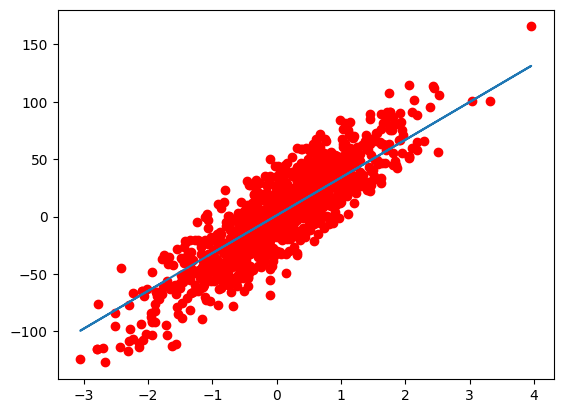

In [233]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# set the random seed
torch.manual_seed(42)  # Set random seed for reproducibility

x_numpy, y_numpy = datasets.make_regression(n_samples =1000, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(x_numpy.astype(np.float32))
Y = torch.from_numpy(y_numpy.astype(np.float32))

Y= Y.view(Y.shape[0], 1)  # Reshape Y to be a column vector

n_samples, n_features = X.shape

class model_lr(nn.Module):
    def __init__(self, input_dim=1, output_dim=1):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)
    
model = model_lr(n_features, 1)  # Create an instance of the model
loss_fn = nn.MSELoss()  # Define the loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Define the optimizer

#Training loop
n_iter = 100
for epoch in range(n_iter):
    y_pred = model(X) #Forward pass
    loss = loss_fn(Y, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch %2 ==0:
        [w, b]= model.parameters()
        print(f"epoch {epoch+1}, loss: {l:.3f}, w: {w[0][0].item():.3f}")

#plot the (x,y) and the predicted line
predicted = model(X).detach().numpy()  # Get the predicted values
plt.plot(X.numpy(), Y.numpy(), 'ro', label='Original data')  # Plot original data
plt.plot(X.numpy(), predicted, label='Fitted line')  # Plot the fitted line
plt.show()


569 30
torch.Size([455, 1]) torch.Size([114, 1])
Epoch 1, Loss: 0.6833
Epoch 11, Loss: 0.5449
Epoch 21, Loss: 0.4624
Epoch 31, Loss: 0.4080
Epoch 41, Loss: 0.3692
Epoch 51, Loss: 0.3399
Epoch 61, Loss: 0.3169
Epoch 71, Loss: 0.2983
Epoch 81, Loss: 0.2827
Epoch 91, Loss: 0.2696
Test Accuracy: 96.49%


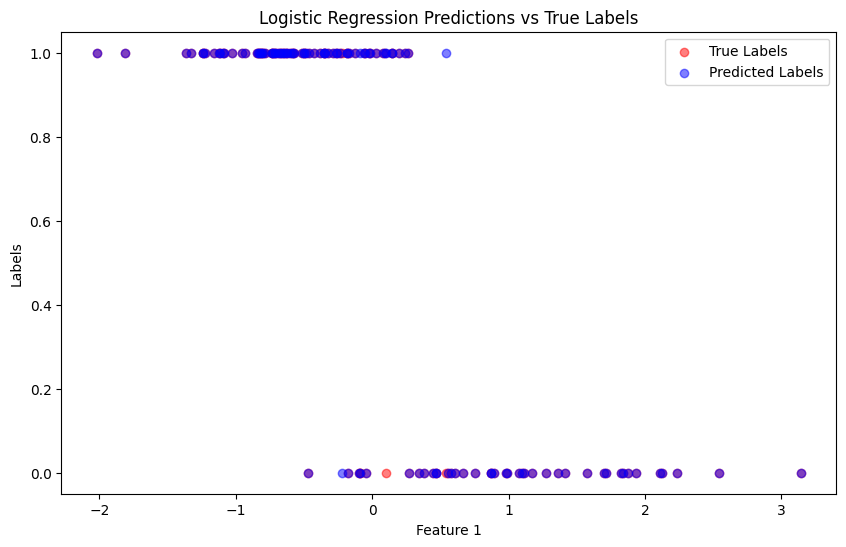

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#prepare data
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_samples, n_features = x.shape
print(n_samples, n_features)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#standarize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(-1, 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).view(-1, 1)

print(y_train.shape, y_test.shape)

class model_logistic(nn.Module):

    def __init__(self, input_dim, output_dim=1):
        super(model_logistic, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoid(self.linear(x))

num_samples, n_features = x_train.shape
model = model_logistic(n_features)
# Define loss function and optimizer
loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Training loop
n_iter = 100
for epoch in range(n_iter):
    y_pred = model(x_train)  # Forward pass
    loss = loss_fn(y_pred, y_train)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update model parameters
    optimizer.zero_grad()  # Zero the gradients before the next iteration

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

with torch.no_grad():
    y_eval_pred = model(x_test)  # Forward pass on test set
    y_eval_pred = (y_eval_pred > 0.5).float()  # Convert probabilities to binary predictions
    accuracy = (y_eval_pred == y_test).float().mean()  # Calculate accuracy
    print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")
    # Plotting the predictions
    plt.figure(figsize=(10, 6))
    #show the scatter plot in red

    plt.scatter(x_test[:, 0].numpy(), y_test.numpy(), color='red', label='True Labels', alpha=0.5)
    plt.scatter(x_test[:, 0].numpy(), y_eval_pred.numpy(), color ='blue', label='Predicted Labels', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Labels')
    plt.title('Logistic Regression Predictions vs True Labels')
    plt.legend()
    plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import math

class wineDataset(Dataset):
    def __init__(self):
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, 0]).long() - 1  # Use class indices
        self.n_samples = self.x.shape[0]
        self.featurelen = self.x.shape[1]
        self.n_classes = len(torch.unique(self.y))
        print(f"Sample size: {self.n_samples}, Feature size: {self.featurelen}, Num classes: {self.n_classes}")

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples

class model_wine(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(model_wine, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)  # logits for CrossEntropyLoss

# Load and split dataset
ds = wineDataset()
val_size = int(0.2 * len(ds))
train_size = len(ds) - val_size
train_ds, val_ds = random_split(ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=4, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=4)

model = model_wine(input_dim=ds.featurelen, output_dim=ds.n_classes)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
n_iterations = math.ceil(train_size / 4)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (i + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_iterations}], Loss: {loss.item():.4f}')

# Validation
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in val_loader:
        y_pred = model(inputs)
        predicted = torch.argmax(y_pred, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Validation Accuracy: {100 * correct / total:.2f}%')

In [322]:
list1 = [ "hi  how are you", "doing graat", "i am fine", "how about you"]

list_words_sent = [ sent for sent in list1 for sent in sent.split()]

print(list_words_sent)

['hi', 'how', 'are', 'you', 'doing', 'graat', 'i', 'am', 'fine', 'how', 'about', 'you']


In [324]:
x= torch.randn(3,4)
print(x)
y = x[:, -1]
print(y)


tensor([[-0.9366, -0.2624,  0.5368, -0.8170],
        [ 1.0644,  0.1404,  0.2971, -1.0080],
        [ 0.9708,  0.1768,  0.3880, -0.0163]])
tensor([-0.8170, -1.0080, -0.0163])


In [2]:
# give example of a decorator class
def decorator_class(cls):
    class DecoratedClass(cls):
        def new_method(self):
            print("This is a new method added by the decorator class.")
            return super().new_method()
    
    return DecoratedClass

@decorator_class
class example_class:
    def __init__(self, name):
        self.name = name
    def new_method(self):
        print(f"Hello, {self.name}!")

# Create an instance of the decorated class
example_instance = example_class("Alice")
example_instance.new_method()  # Call the new method


This is a new method added by the decorator class.
Hello, Alice!


In [13]:
import torch
import torch.nn as nn

#create a data set for linear regression with one variable
w =0.8
b =10

x= torch.rand(100) * (10-1) +1  # Create a tensor of shape (100, 1)
x= x.unsqueeze(1)  # Ensure x is a 2D tensor
print(x.shape)
#print(x[:10])
y = w *x  + b
#print(y[:10])

train_size = int(0.8*len(x))
x_train, x_val = torch.split(x, [train_size, len(x) - train_size])
y_train, y_val = torch.split(y, [train_size, len(y) - train_size])

class linerRegression(nn.Module):
    def __init__(self, input_dim=1, output_dim=1):
        super(linerRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)
model = linerRegression()
# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent
# Training loop

n_iter = 1000
for epoch in range(n_iter):
    y_pred = model(x_train)
    loss = loss_fn(y_train, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 0:
        [w, b] = model.parameters()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, w: {w[0][0].item():.4f}, b: {b.item():.4f}")
# Validation
with torch.no_grad():
    y_val_pred = model(x_val)
    val_loss = loss_fn(y_val, y_val_pred)
    print(f"Validation Loss: {val_loss.item():.4f}")

torch.Size([100, 1])
Epoch 1, Loss: 115.9357, w: 1.8169, b: 0.9302
Epoch 101, Loss: 6.9309, w: 1.7770, b: 3.3520
Epoch 201, Loss: 3.7613, w: 1.5197, b: 5.1026
Epoch 301, Loss: 2.0412, w: 1.3302, b: 6.3922
Epoch 401, Loss: 1.1077, w: 1.1906, b: 7.3423
Epoch 501, Loss: 0.6012, w: 1.0877, b: 8.0421
Epoch 601, Loss: 0.3262, w: 1.0120, b: 8.5577
Epoch 701, Loss: 0.1770, w: 0.9561, b: 8.9375
Epoch 801, Loss: 0.0961, w: 0.9150, b: 9.2173
Epoch 901, Loss: 0.0521, w: 0.8847, b: 9.4234
Validation Loss: 0.0275


In [ ]:
class tickersymbol:
    def __init__(self, symbol):
        self.symbol = symbol

    def __repr__(self):
        return f"TickerSymbol(symbol={self.symbol})"
    
stock1= tickersymbol("AAPL")
print(stock1)

class stockaction():
    def __init__(self,symbol):
        self.symbol = symbol
        self.price = None

    def sell(self, action, limit_price):
       # print(f"Sell action for {self.symbol} at price {limit_price}")
        self.action = action
        self.price = limit_price

    def buy(self, action, limit_price):
       # print(f"Buy action for {self.symbol} at price {limit_price}")
        self.action = action
        self.price = limit_price
    
    # def print(self):
    #     return f"Action: {self.action}, Symbol: {self.symbol}, Price: {self.price}"
    def __repr__(self):
        return f"StockAction(symbol={self.symbol}, action={self.action}, price={self.price})"

class stocktransactions():
    def __init__(self):
        self.transactions = {}

    def creatennewtransaction(self, symbol, action, limit_price):
        if action == "sell":
           # print(f"Adding sell transaction for {symbol}, action {action},  price {limit_price}")
            if action not in self.transactions[symbol]:
                self.transactions[symbol][action] = []
                self.transactions[symbol][action].append(stockaction(symbol))
                self.transactions[symbol][action][-1].sell(action, limit_price)
                #sort the transactions by price
                #self.transactions[symbol][action].sort(key=lambda x:x.price)
            else:
                self.transactions[symbol][action].append(stockaction(symbol))
                self.transactions[symbol][action][-1].sell(action, limit_price)
                #sort the transactions by price
                self.transactions[symbol][action].sort(key=lambda x:x.price, reverse= True)

        elif action == "buy":
            #print(f"Adding buy transaction for {symbol}, action {action},  price {limit_price}")
            if action not in self.transactions[symbol]:
                self.transactions[symbol][action] = []
                self.transactions[symbol][action].append(stockaction(symbol))
                self.transactions[symbol][action][-1].buy(action, limit_price)
                #self.transactions[symbol][action].sort(key=lambda x:x.prince)
            else:
                self.transactions[symbol][action].append(stockaction(symbol))
                self.transactions[symbol][action][-1].buy(action, limit_price)
                self.transactions[symbol][action].sort(key=lambda x:x.price, reverse= True) 


    def add_transaction(self, symbol, action, limit_price):
        if symbol not in self.transactions:
            self.transactions[symbol]={}
            print(f"Symbol {symbol} doesnt exist in transactions.")
            self.creatennewtransaction(symbol, action, limit_price)
        else:
            self.creatennewtransaction(symbol, action, limit_price)

    def __repr__(self):
        result = "Stock Transactions:\n"
        for symbol, actions in self.transactions.items():
            result += f"Symbol: {symbol}\n"
            for action, transactions in actions.items():
                result += f"  Action: {action}, # of transactions : {len(transactions)}\n"
                for transaction in transactions:
                    result += f"    {transaction}\n"
        return result
        
transaction = stocktransactions()
transaction.add_transaction("AAPL", "buy", 150)
transaction.add_transaction("AAPL", "sell", 155)
transaction.add_transaction("AAPL", "sell", 120)
transaction.add_transaction("nvda", "buy", 145)
transaction.add_transaction("nvda", "sell", 150)
transaction.add_transaction("nvda", "sell", 10)
print(f"{transaction}")
    
    

TickerSymbol(symbol=AAPL)
Symbol AAPL doesnt exist in transactions.


TypeError: sort() got an unexpected keyword argument 'reversed'. Did you mean 'reverse'?